In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import basicdifeq as bde

In [ ]:
###############################################################################
# SISTEMA DE ECUACIONES DIFERENCIALES PREDEFINIDOS
sistemas_predefinidos = {
    1: ("Van der Pol", "mu*(1-x**2)*x - y", "x", ["mu"]),
    2: ("Lotka-Volterra", "a*x - b*x*y", "c*x*y - d*y", ["a", "b", "c", "d"]),
    3: ("Rayleigh", "x*(1-x**2-y**2)", "y*(1-x**2-y**2)", []),
    4: ("FitzHugh-Nagumo", "x - (x**3)/3 - y + I", "epsilon*(x + a - b*y)", ["I", "epsilon", "a", "b"])
}

###############################################################################
# OBTENER LA EXPRESIÓN DE LA ECUACIÓN DIFERENCIAL
seleccionar_sistema = input("¿Desea seleccionar un sistema? (s/n): ").lower()
if seleccionar_sistema == "s":
    print("Selecciona un sistema:\n")
    for key, value in sistemas_predefinidos.items():
        print(f"{key}. {value[0]}")
    sistema = int(input(" = ")) # Opción seleccionada   
    for i in sistemas_predefinidos[sistema][3]: # Parámetros del sistema
        exec(f"{i}=float(input('{i} = '))")
    print("Sistema seleccionado:")
    f1_original = sistemas_predefinidos[sistema][1]
    f2_original = sistemas_predefinidos[sistema][2]
    nombre = sistemas_predefinidos[sistema][0]
else:
    f1_original = input("dx/dt = ")
    f2_original = input("dy/dt = ")
    nombre = input("Ingresar el nombre del sistema = ")

print(f"El sistema {nombre} se expresa como:")
print(f"dx/dt = {f1_original}")
print(f"dy/dt = {f2_original}")

Selecciona un sistema:

1. Van der Pol
2. Lotka-Volterra
3. Rayleigh
4. FitzHugh-Nagumo
Sistema seleccionado:
El sistema Lotka-Volterra se expresa como:
dx/dt = a*x - b*x*y
dy/dt = c*x*y - d*y


In [18]:
linealizar = input("¿Desea linealizar el sistema? (s/n): ").lower()
nulclinas = input("¿Desea calcular las nulclinas? (s/n): ").lower()

In [22]:
###############################################################################
# JACOBIANO
if linealizar == "s":
    x, y = sp.symbols('x y')
    f1 = eval(f1_original)
    f2 = eval(f2_original)
    
    # Calcular Jacobiano
    J = bde.calcular_jacobiano(f1, f2, [x, y])

    print("Matriz Jacobiana del sistema:")
    sp.pprint(J)
    
    # Evaluar en un punto de equilibrio (ejemplo en (0,0))
    J_eq = J.subs({x: 0, y: 0})
    print("\nJacobiano evaluado en (0,0):")
    sp.pprint(J_eq)
    
    # Calcular valores propios (para análisis de estabilidad)
    eigenvals = J_eq.eigenvals()
    print("\nValores propios en (0,0):")
    sp.pprint(eigenvals)

    # Sistema linealizado
    f1_linealizado = str(np.array(J_eq)[0][0] * x + np.array(J_eq)[0][1] * y)
    f2_linealizado = str(np.array(J_eq)[1][0] * x + np.array(J_eq)[1][1] * y)
    print("\nSistema linealizado:")
    print(f"dx/dt = {f1_linealizado}")
    print(f"dy/dt = {f2_linealizado}")

Matriz Jacobiana del sistema:
⎡0.5 - 0.4⋅y    -0.4⋅x   ⎤
⎢                        ⎥
⎣   0.3⋅y     0.3⋅x - 0.2⎦

Jacobiano evaluado en (0,0):
⎡0.5   0  ⎤
⎢         ⎥
⎣ 0   -0.2⎦

Valores propios en (0,0):
{-0.2: 1, 0.5: 1}

Sistema linealizado:
dx/dt = 0.5*x
dy/dt = -0.2*y


In [23]:
###############################################################################
# NULCLINAS
if nulclinas == "s":
    #x, y = sp.symbols('x y')
    #f1 = eval(f1_original)
    #f2 = eval(f2_original)

    # Calcular nulclinas
    nulclina_x = sp.solve(f1, y)  # Resuelve dx/dt = 0 para y
    nulclina_y = sp.solve(f2, y)  # Resuelve dy/dt = 0 para y

    print("Nulclinas:")
    print(f"Nulclina de x (dx/dt = 0): y = {nulclina_x}")
    print(f"Nulclina de y (dy/dt = 0): y = {nulclina_y}")

Nulclinas:
Nulclina de x (dx/dt = 0): y = [1.25000000000000]
Nulclina de y (dy/dt = 0): y = [0.0]


In [16]:
mu = 0.5
f1 = "2*x-mu*y"
f2 = "x+y"
z = np.array([1,2])
print(bde.f(z,f1,f2,{"mu":mu}))
RK = bde.runge_kutta(f1,f2,z,0.1,300,{"mu":0.5})
print(RK)

1.0
[1. 3.]
1.0
1.0250000000000001
1.0225
1.0439375
1.0442489583333332
1.063096848958333
1.0593974765624998
1.073200584440104
1.0735971980913628
1.083592245109619
1.0783815196742865
1.0814776855388823
1.0819777076817223
1.079731867777703
1.0726326311190897
1.0611858565576733
1.0618109178100728
1.0431069499210708
1.0336650365014075
1.002920380765456
1.0036960414924359
0.9633201020069957
0.950990610824852
0.8950910320461931
0.8960474135575898
0.827592078841918
0.8117234822998323
0.723494663763395
0.724667167644613
0.6203002685428189
0.6001160638797707
0.4708142849547863
0.472244410436256
0.322438443341865
0.2970160207124799
0.11603347878856818
0.11776974867289614
-0.0890140568887765
-0.12076768865223331
-0.36624641793687873
-0.3641474117493346
-0.6418270410402882
-0.6812030641104974
-1.006600528026587
-1.0040729479898989
-1.369373057404275
-1.4178926178914946
-1.8417019045715768
-1.8386693483156429
-2.311616613188979
-2.3710670194930064
-2.9153879717506617
-2.911761998751646
-3.516257693

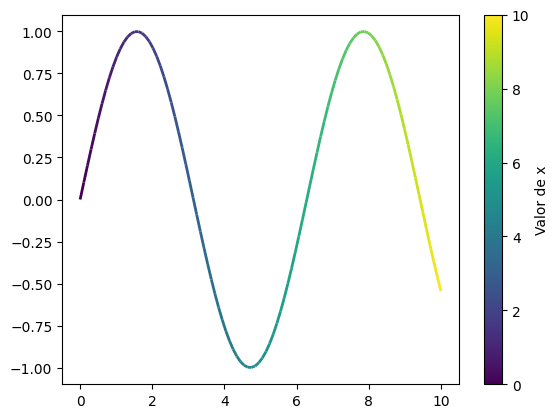

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Datos de tu gráfica
x_rk_lineal = np.linspace(0, 10, 100)
y_rk_lineal = np.sin(x_rk_lineal)

# Crear segmentos de la línea
points = np.array([x_rk_lineal, y_rk_lineal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Crear el gradiente
norm = plt.Normalize(0, 10)  # Normalizar los valores de x
lc = LineCollection(segments, cmap='viridis', norm=norm)
lc.set_array(x_rk_lineal)  # Asignar los valores de x al gradiente
lc.set_linewidth(2)

# Graficar
fig, ax = plt.subplots()
line = ax.add_collection(lc)
ax.autoscale()
plt.colorbar(line, ax=ax, label='Valor de x')  # Barra de colores
plt.show()


In [2]:
import basicdifeq as bd

A = [[0, 0.5, 0], [-1, 0, 0], [0, -0.5, 0]]
B = [[0, 1, 0], [0, 0, 0], [0, 0, 0]]

f1 = bd.hilbert_system(A)
f2 = bd.hilbert_system(B)

print(f"dy/dt = {f1}")
print(f"dx/dt = {f2}")


dy/dt = 0.5*y-1*x-0.5*x**2*y
dx/dt = 1*y


In [52]:
import math
import numpy as np
# Function to calculate the average systen diferential equation
def average_system(A,B):
    R = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(A)):
        for j in range(len(A[0])):
                        # If i is even and j is odd
            if i % 2 == 0 and (j+1) % 2 == 0:
                print(f"i even {i} and j odd {j}")
                R[i][j]=1/(2**(i+j+1)*math.factorial(int((i+j+1)/2)))
                R[i][j]=R[i][j]*(math.factorial(i)*math.factorial(j+1))/(math.factorial(int(i/2))*math.factorial(int((j+1)/2)))*A[i][j]
            # If i is odd and j is even
            elif (i+1) % 2 == 0 and j % 2 == 0:
                print(F"i odd: {i}, j even: {j}")
                R[i][j]=1/(2**(i+j+1)*math.factorial(int((i+j+1)/2)))
                R[i][j]=R[i][j]*(math.factorial(i+1)*math.factorial(j))/(math.factorial(int((i+1)/2))*math.factorial(int(j/2)))*B[i][j]
            else:
                R[i][j]=0
    return R

In [3]:
import math
import basicdifeq as bde
a = bde.f([2,math.pi/2],"r**2","math.pi/2*theta",type="polar")
print(a)

[4.        2.4674011]


In [35]:
(4+1)%2

1

In [5]:
epsilon = 0.4
A = input("Ingresar la matriz de coeficientes de dx/dt: ")
print(A)
A = eval(A)
print(A)

[[0, epsilon, 0], [-1, 0, 0], [0, epsilon, 0]]
[[0, 0.4, 0], [-1, 0, 0], [0, 0.4, 0]]


In [7]:
import basicdifeq as bd
#A =[[0, 0.5, 0],[-1,0,0],[0,-0.5,0]]
#B =[[0,1,0],[0,1,0],[0,0,-3]]
# Van der Pol
A = [[0, 1, 0], [0, 0, 0], [0, 0, 0]]
B = [[0, epsilon, 0], [-1, 0, 0], [0, -epsilon, 0]]
[[0, 0.5, 0], [-1, 0, 0], [0, -0.5, 0]]
# Rayleigh
A = [[0, 0.5, 0, -0.5], [-1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
B = [[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
# FitzHugh-Nagumo
DX = [[I,-1,0,0],[1,0,0,0],[0,0,0,0],[-1/3,0,0,0]]
DY = [[epsilon*a,-epsilon*b,0,0],[epsilon,0,0,0],[0,0,0,0],[0,0,0,0]]

DX = [[0,0,0,0],[1,0,0,0],[0,0,0,0],[-1/3,0,0,0]]
DY = [[0,-epsilon*b,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

f1 = bd.hilbert_system(A)
f2 = bd.hilbert_system(B)
print("Differential equations system:")
print(f"dy/dt = {f1}")
print(f"dx/dt = {f2}")
R = bd.average_system(A,B)
print(R)
print("Average differential equation system:")
R_poly = bd.polynomial_averaging(R)
print(R_poly)

Differential equations system:
dy/dt = 1*y
dx/dt = 0.4*y-1*x-0.4*x**2*y
[[0, 0.5, 0], [-0.5, 0, 0.0], [0, 0.0, 0]]
Average differential equation system:



In [10]:
import math
math.pi/2


1.5707963267948966

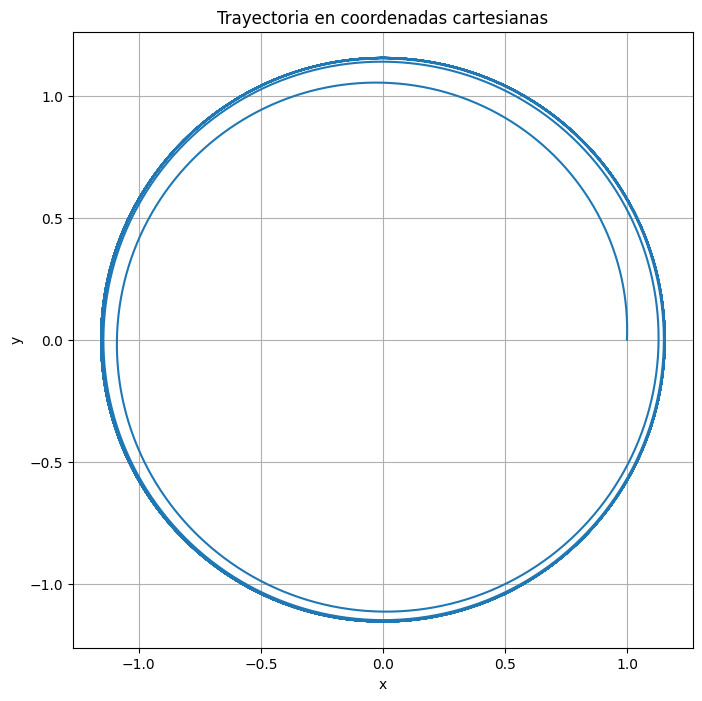

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 0.25
b = 0.1875
omega = np.pi/2

# Sistema en polares
def f(r, theta):
    dr = a*r - b*r**3
    dtheta = omega
    return dr, dtheta

# Runge-Kutta de 4° orden
def runge_kutta(r0, theta0, h, num_steps):
    r = np.zeros(num_steps)
    theta = np.zeros(num_steps)
    r[0] = r0
    theta[0] = theta0
    
    for i in range(1, num_steps):
        dr1, dtheta1 = f(r[i-1], theta[i-1])
        dr2, dtheta2 = f(r[i-1] + 0.5*h*dr1, theta[i-1] + 0.5*h*dtheta1)
        dr3, dtheta3 = f(r[i-1] + 0.5*h*dr2, theta[i-1] + 0.5*h*dtheta2)
        dr4, dtheta4 = f(r[i-1] + h*dr3, theta[i-1] + h*dtheta3)
        
        r[i] = r[i-1] + (h/6)*(dr1 + 2*dr2 + 2*dr3 + dr4)
        theta[i] = theta[i-1] + (h/6)*(dtheta1 + 2*dtheta2 + 2*dtheta3 + dtheta4)
    
    return r, theta

# Transformación a cartesianas
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Parámetros de simulación
r0 = 1.0
theta0 = 0.0
h = 0.01
num_steps = 5000

# Resolución
r, theta = runge_kutta(r0, theta0, h, num_steps)
x, y = polar_to_cartesian(r, theta)

# Gráfica en cartesianas
plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.title('Trayectoria en coordenadas cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()


In [5]:
import sympy as sp
from sympy import symbols
R = [[0, 2, 0], [4, 0, 6], [0, 8, 0]]
D = ""
r = symbols('r')
cont = 0
# Dimensions of the matrix
n = len(R)
m = len(R[0])
R_transform = [0, 0, 0, 0, 0]
for i in range(n):
    for j in range(m):
        R_transform[i+j] += R[i][j]
# Create the polynomial
p = len(R_transform)
for i in range(p):
    if R_transform[i] != 0:
        cont += 1
        if i == 0:
            D = str(R_transform[i])
        elif i > 0:
            if R_transform[i] > 0 and cont > 1:
                D += "+"
            D += str(R_transform[i])
            if i == 1:
                D += "*r"
            else:
                D += "*r**" + str(i)
    
print(R_transform)  
print(D)     
    

[0, 6, 0, 14, 0]
6*r+14*r**3


In [ ]:
# Ejemplo 1
DY = [[0,2,0,-4],[0,0,-4,0],[0,-2,0,0],[-2,0,0,0]]
DX = [[0,2,0,0],[2,0,0,0],[0,0,0,0],[0,0,0,0]]

# Ejemplo 2
DY = [[0,0,0,4,0,-4],[-4,0,0,0,0,0],[0,0,0,-8,0,0],[-4,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
DX = [[0,0,0,4,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]


In [1]:
from sympy import symbols, Poly
import numpy as np

def polinomio_a_matriz(polinomio_str):
    # Definir símbolos
    x, y = symbols('x y')
    
    # Convertir el string en una expresión simbólica
    expr = eval(polinomio_str)
    
    # Convertir la expresión en un polinomio de sympy
    poly = Poly(expr, x, y)
    
    # Obtener los términos (monomios) del polinomio
    terminos = poly.terms()
    
    # Encontrar los grados máximos de x e y
    max_grado_x = max(term[0][0] for term in terminos)
    max_grado_y = max(term[0][1] for term in terminos)
    
    # Crear una matriz de ceros con dimensiones adecuadas
    matriz_coeficientes = np.zeros((max_grado_x + 1, max_grado_y + 1), dtype=int)
    
    # Llenar la matriz con los coeficientes
    for term in terminos:
        grado_x, grado_y = term[0]
        coeficiente = term[1]
        matriz_coeficientes[grado_x, grado_y] = coeficiente
    
    return matriz_coeficientes


Matriz de coeficientes:
[[ 0  0  0  0 -7]
 [ 0  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0 -3  0  0]]


In [6]:
# Ejemplo de uso

polinomio_str = input("Ingresar el polinomio: ")
print(polinomio_str)
A = polinomio_a_matriz(polinomio_str)
print("Matriz de coeficientes:")
print(A)

y-x**2*y
Matriz de coeficientes:
[[ 0  1]
 [ 0  0]
 [ 0 -1]]


In [18]:
import math
n = len(A)
m = len(A[0])
R = np.zeros((n, m), dtype=float)
for i in range(n):
    for j in range(m):
                    # If i is even and j is odd
        if i % 2 == 0 and (j+1) % 2 == 0:
            R[i][j]=1/(2**(i+j+1)*math.factorial(int((i+j+1)/2)))
            R[i][j]=R[i][j]*(math.factorial(i)*math.factorial(j+1))/(math.factorial(int(i/2))*math.factorial(int((j+1)/2)))*A[i][j]
print(R)

[[ 0.     0.5  ]
 [ 0.     0.   ]
 [ 0.    -0.125]]


In [19]:
D = ""
r = symbols('r')
cont = 0
# Dimensions of the matrix
n = len(R)
m = len(R[0])
R_transform = [0 for k in range(n+m-1)]
for i in range(n):
    for j in range(m):
        R_transform[i+j] += R[i][j]
# Create the polynomial
p = len(R_transform)
for i in range(p):
    if R_transform[i] != 0:
        cont += 1
        if i == 0:
            D = str(R_transform[i])
        elif i > 0:
            if R_transform[i] > 0 and cont > 1:
                D += "+"
            D += str(R_transform[i])
            if i == 1:
                D += "*r"
            else:
                D += "*r**" + str(i)
print(D)

0.5*r-0.125*r**3


In [29]:
import basicdifeq as bde
P = polinomio_str
print(P)
P=bde.polinomio_a_matriz(P)
print(P)
epsilon = float(input("epsilon = "))
f1_original = "y"
f2_original = "-x"+"+" + str(epsilon) + "*(" + bde.hilbert_system(P) + ")"
print(f2_original)

y-x**2*y
[[ 0  1]
 [ 0  0]
 [ 0 -1]]
-x+0.5*(1*y-1*x**2*y)


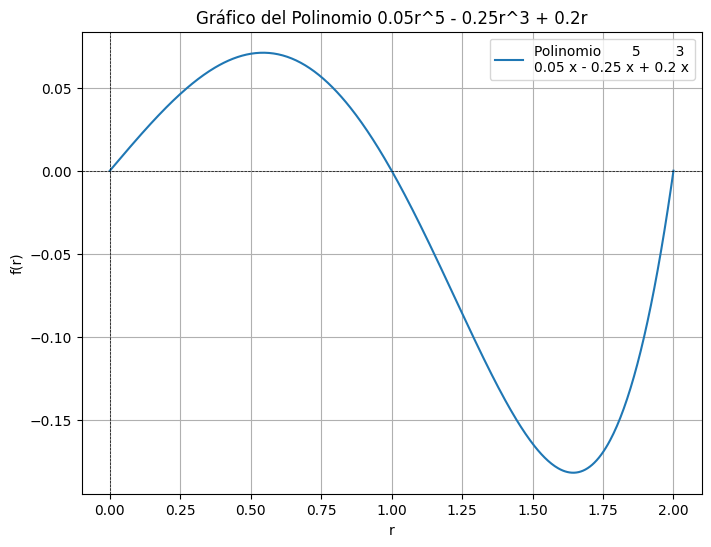

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función general para graficar polinomios
def graficar_polinomio(coeficientes, rango=(0, 5), puntos=500, titulo="Gráfico del Polinomio"):
    """
    Grafica un polinomio dado sus coeficientes.
    
    Parámetros:
    - coeficientes: lista de coeficientes del polinomio (de mayor a menor grado)
    - rango: tupla con el rango de valores de r a graficar
    - puntos: número de puntos a evaluar
    - titulo: título del gráfico
    """
    # Creamos el rango de valores
    r = np.linspace(rango[0], rango[1], puntos)
    
    # Evaluamos el polinomio usando numpy.polyval
    y = np.polyval(coeficientes, r)
    
    # Graficamos
    plt.figure(figsize=(8, 6))
    plt.plot(r, y, label=f"Polinomio {np.poly1d(coeficientes)}")
    plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black',linewidth=0.5, linestyle='--')
    plt.title(titulo)
    plt.xlabel('r')
    plt.ylabel('f(r)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Coeficientes del polinomio específico dado: 0.05*r^5 - 0.25*r^3 + 0.2*r
coeficientes = [0.05, 0, -0.25, 0, 0.2, 0]

# Graficamos el polinomio específico
graficar_polinomio(
    coeficientes=coeficientes,
    rango=(0, 2),
    puntos=500,
    titulo="Gráfico del Polinomio 0.05r^5 - 0.25r^3 + 0.2r"
)

# Para graficar otro polinomio, simplemente cambia los coeficientes
# Ejemplo: Para 2r^3 - r^2 + 3r - 1 usar coeficientes = [2, -1, 3, -1]


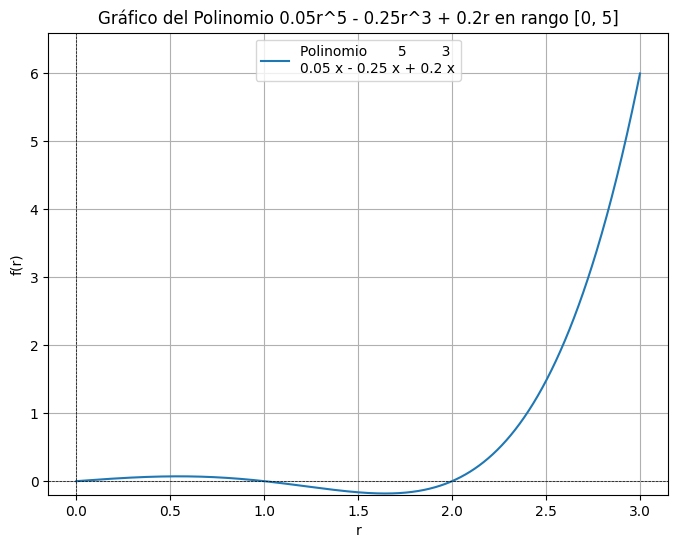

Raíces del polinomio: [-2.  2. -1.  1.  0.]


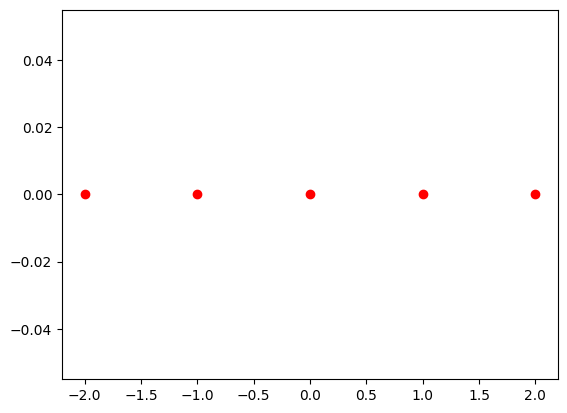

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función general para graficar polinomios
def graficar_polinomio(coeficientes, rango=(-2, 2), puntos=500, titulo="Gráfico del Polinomio"):
    """
    Grafica un polinomio dado sus coeficientes.
    
    Parámetros:
    - coeficientes: lista de coeficientes del polinomio (de mayor a menor grado)
    - rango: tupla con el rango de valores de r a graficar
    - puntos: número de puntos a evaluar
    - titulo: título del gráfico
    """
    # Creamos el rango de valores
    r = np.linspace(rango[0], rango[1], puntos)
    
    # Evaluamos el polinomio usando numpy.polyval
    y = np.polyval(coeficientes, r)
    
    # Escalamos automáticamente los ejes para mejorar la visualización
    plt.figure(figsize=(8, 6))
    plt.plot(r, y, label=f"Polinomio {np.poly1d(coeficientes)}")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(titulo)
    plt.xlabel('r')
    plt.ylabel('f(r)')
    plt.grid(True)
    
    # Ajustamos los límites de los ejes para centrarnos en la región relevante
    plt.ylim([np.min(y) - 0.1 * abs(np.min(y)), np.max(y) + 0.1 * abs(np.max(y))])
    plt.legend()
    plt.show()

# Coeficientes del polinomio específico dado: 0.05*r^5 - 0.25*r^3 + 0.2*r
coeficientes = [0.05, 0, -0.25, 0, 0.2, 0]

# Graficamos el polinomio específico con rango ampliado
graficar_polinomio(
    coeficientes=coeficientes,
    rango=(0, 3),
    puntos=1000,  # Aumentamos el número de puntos para mayor precisión
    titulo="Gráfico del Polinomio 0.05r^5 - 0.25r^3 + 0.2r en rango [0, 5]"
)

# Para graficar otro polinomio, simplemente cambia los coeficientes
# Ejemplo: Para 2r^3 - r^2 + 3r - 1 usar coeficientes = [2, -1, 3, -1]

# Encontrar y mostrar las raíces del polinomio
raices = np.roots(coeficientes)
print("Raíces del polinomio:", raices)

# Marcar las raíces reales en la gráfica
raices_reales = [x for x in raices if np.isreal(x)]
plt.scatter(raices_reales, [0] * len(raices_reales), color='red', label="Raíces")



Raíces del polinomio: [-2.  2. -1.  1.  0.]


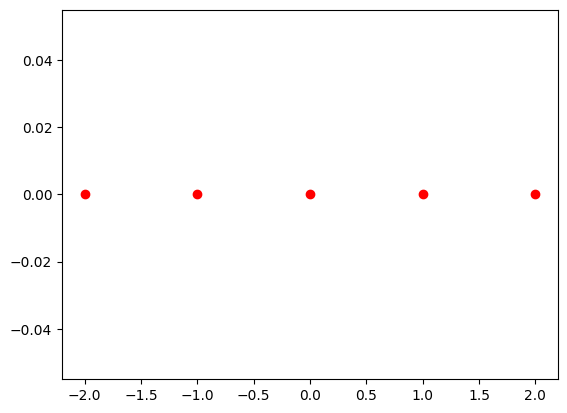

In [17]:
# Encontrar y mostrar las raíces del polinomio
raices = np.roots(coeficientes)
print("Raíces del polinomio:", raices)

# Marcar las raíces reales en la gráfica
raices_reales = [x for x in raices if np.isreal(x)]
plt.scatter(raices_reales, [0] * len(raices_reales), color='red', label="Raíces")


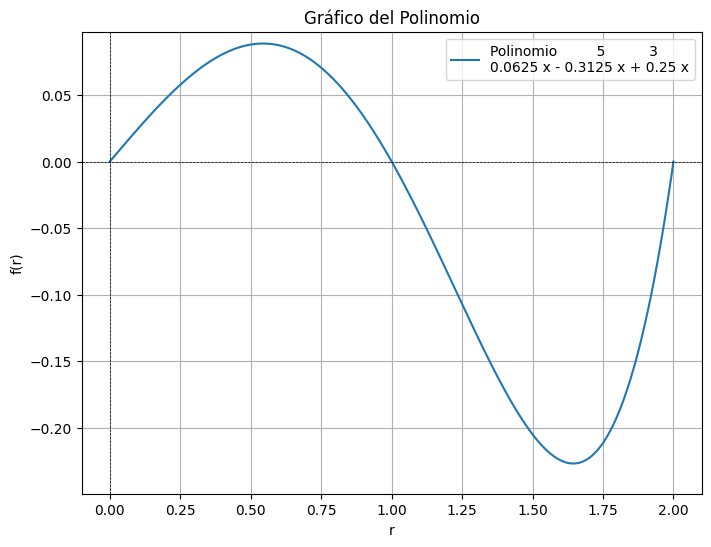

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar polinomios (la misma que antes)
def graficar_polinomio(coeficientes, rango=(0, 2), puntos=500, titulo="Gráfico del Polinomio"):
    """
    Grafica un polinomio dado sus coeficientes.
    """
    r = np.linspace(rango[0], rango[1], puntos)
    y = np.polyval(coeficientes, r)
    
    plt.figure(figsize=(8, 6))
    plt.plot(r, y, label=f"Polinomio {np.poly1d(coeficientes)}")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(titulo)
    plt.xlabel('r')
    plt.ylabel('f(r)')
    plt.grid(True)
    plt.ylim([np.min(y) - 0.1 * abs(np.min(y)), np.max(y) + 0.1 * abs(np.max(y))])
    plt.legend()
    plt.show()

# Coeficientes en el formato que ya tienes (de menor a mayor grado)
coeficientes_menor_a_mayor = np.array([np.float64(0.0), np.float64(0.25), np.float64(0.0), 
                                       np.float64(-0.3125), np.float64(0.0), np.float64(0.0625)])

# Invertir el orden para obtener coeficientes de mayor a menor grado
coeficientes_mayor_a_menor = coeficientes_menor_a_mayor[::-1]

# Graficar el polinomio con los coeficientes invertidos
graficar_polinomio(
    coeficientes=coeficientes_mayor_a_menor,
    rango=(0, 2),
    puntos=500,
    titulo="Gráfico del Polinomio"
)
